# Exploratory Data Analysis : Nutrition Fact for McDonald's Menu

**Import Dataset**

In [1]:
import pandas as pd
df_mcd = pd.read_csv("menu.csv")
df_mcd.head(3)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10


### a. How many calories does the average McDonald's value meal contain?

The McDonald's Menu is divided into nine categories, we will explore the average calories per categories, and the average calories for all menu (total).

In [3]:
df_a = df_mcd.groupby('Category',axis=0).mean()
df_a['Calories']

Category
Beef & Pork           494.000000
Beverages             113.703704
Breakfast             526.666667
Chicken & Fish        552.962963
Coffee & Tea          283.894737
Desserts              222.142857
Salads                270.000000
Smoothies & Shakes    531.428571
Snacks & Sides        245.769231
Name: Calories, dtype: float64

From the result above, we can see that the chicken & fish menu have the biggest calories average. It's make sense because this menu contain a lot of animal protein. The least calories average comes from beverages menu.

In [4]:
df_a1 = df_a['Calories']

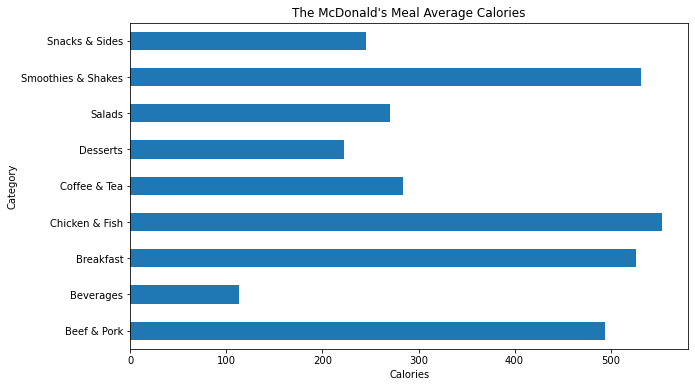

In [21]:
df_a1.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Calories') # add to x-label to the plot
plt.ylabel('Category') # add y-label to the plot
plt.title("The McDonald's Meal Average Calories") # add title to the plot

plt.show()

In [6]:
df_mcd['Calories'].mean()

368.2692307692308

This is the average calories of all menu from McDonald.

In [7]:
df_1 = df_mcd.groupby('Category', axis=0).sum()

print(type(df_mcd.groupby('Category', axis=0)))

df_1.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Category,,,,,,,,,,,,,,,,,,,,,
Beef & Pork,7410,3370,373.0,579,157.0,780,16.5,1310,434,15310,...,602,202,38,148,132,410,104,110,345,350
Beverages,3070,20,2.5,4,1.5,8,0.0,15,5,1120,...,778,259,1,2,752,36,20,634,80,8
Breakfast,22120,10455,1163.0,1792,447.5,2244,4.5,6420,2140,50865,...,2090,696,137,539,347,834,291,374,679,720
Chicken & Fish,14930,6540,728.0,1116,166.5,840,3.5,2035,681,33960,...,1325,441,79,319,198,786,552,341,417,442
Coffee & Tea,26970,6755,762.0,1174,467.5,2315,13.5,2590,891,13005,...,4230,1412,74,302,3763,842,1020,0,2688,204


### b. How much do beverages, like soda or coffee, contribute to the overall caloric intake?

To answer this, we will create a pie chart, to know how much the contribution (percentage) of beverage to total caloric intake.

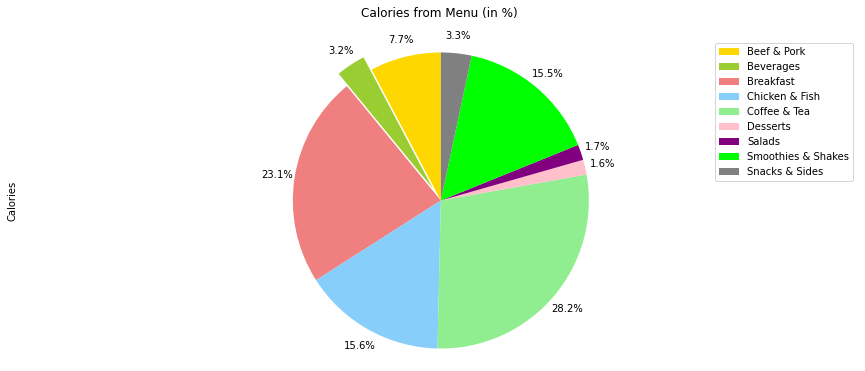

In [8]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'purple','lime','grey']
explode_list = [0, 0.1, 0, 0, 0, 0, 0, 0, 0] # ratio for each continent with which to offset each wedge.
df_1['Calories'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list
                            )

plt.title('Calories from Menu (in %)\n')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.legend(labels=df_1.index, loc='upper right') 

plt.show()

We can see that beverage only contribute 3.2% to overall caloric intake.

### c. Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?

To answer this, we will choose menu only from chicken and fish category. Then we will look more detail to the menu that has grilled chicken and crispy chicken, and compare that menu.

In [9]:
df_2 = df_mcd[['Category','Item','Calories']]
df_chicken = df_2[df_2.Category == 'Chicken & Fish']
df_chicken
df_chicken.iloc[0]

Category                             Chicken & Fish
Item        Premium Crispy Chicken Classic Sandwich
Calories                                        510
Name: 57, dtype: object

In [10]:
df_3 = df_mcd[['Category','Item','Total Fat (% Daily Value)','Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)',
              'Sodium (% Daily Value)','Carbohydrates (% Daily Value)','Dietary Fiber (% Daily Value)',
              'Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)',
              'Iron (% Daily Value)']]
df_chicken = df_3[df_3.Category == 'Chicken & Fish']
df_chicken

,Category,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,33,18,16,41,18,13,4,6,15,20
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,13,9,22,34,14,13,4,8,15,20
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,51,44,29,59,19,14,8,20,30,20
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,31,36,35,52,15,13,8,20,30,20
61,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,43,31,24,58,19,13,4,20,15,20
62,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,23,22,30,51,14,13,4,20,15,20
63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,59,51,31,72,22,15,8,25,30,15
64,Chicken & Fish,Bacon Clubhouse Grilled Chicken Sandwich,39,42,37,65,17,15,8,30,30,15
65,Chicken & Fish,Southern Style Crispy Chicken Sandwich,29,15,14,38,14,7,4,2,15,15
66,Chicken & Fish,McChicken,25,15,11,33,13,7,0,2,10,15


In [11]:
df_41 = df_chicken.set_index('Item')
df_41

,Category,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Item,,,,,,,,,,,
Premium Crispy Chicken Classic Sandwich,Chicken & Fish,33,18,16,41,18,13,4,6,15,20
Premium Grilled Chicken Classic Sandwich,Chicken & Fish,13,9,22,34,14,13,4,8,15,20
Premium Crispy Chicken Club Sandwich,Chicken & Fish,51,44,29,59,19,14,8,20,30,20
Premium Grilled Chicken Club Sandwich,Chicken & Fish,31,36,35,52,15,13,8,20,30,20
Premium Crispy Chicken Ranch BLT Sandwich,Chicken & Fish,43,31,24,58,19,13,4,20,15,20
Premium Grilled Chicken Ranch BLT Sandwich,Chicken & Fish,23,22,30,51,14,13,4,20,15,20
Bacon Clubhouse Crispy Chicken Sandwich,Chicken & Fish,59,51,31,72,22,15,8,25,30,15
Bacon Clubhouse Grilled Chicken Sandwich,Chicken & Fish,39,42,37,65,17,15,8,30,30,15
Southern Style Crispy Chicken Sandwich,Chicken & Fish,29,15,14,38,14,7,4,2,15,15


In [12]:
df_4 = df_41.iloc[0:8,:]

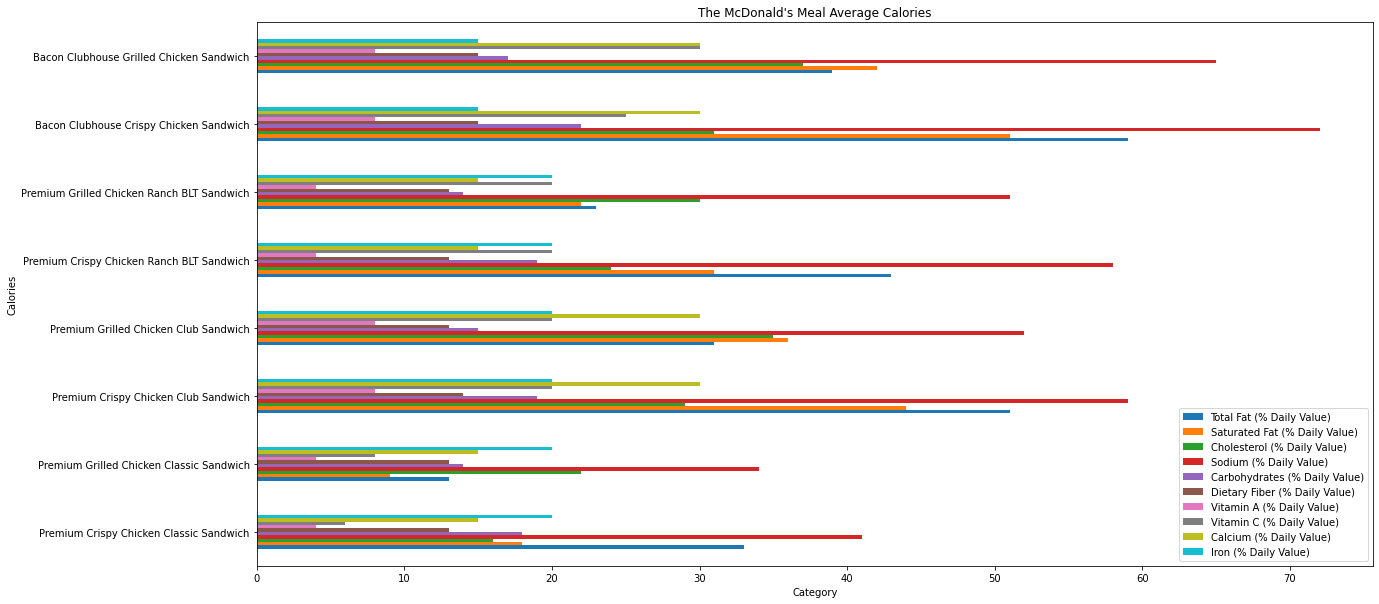

In [13]:
df_4.plot(kind='barh', figsize=(20, 10))

plt.xlabel('Category', rotation='horizontal') # add to x-label to the plot
plt.ylabel('Calories') # add y-label to the plot
plt.title("The McDonald's Meal Average Nutrition") # add title to the plot


plt.show()

There are 4 menu that have two variation of chicken (grilled and crispy), so we compare 8 menu. From this bar chart, we can conclude that crispy chicken have greater total fat, saturated fat, cholesterol etc. It's make sense, because crispy chicken is fried using oil, which increase fat and cholesterol value. Ordered grill chicken will be the right choice if you want a chicken with low fat and cholesterol but the same (not exact) nutrition value.

### d. What about ordering egg whites instead of whole eggs?

We will choose menu only from breakfast category. Then we will look more detail to the menu that has egg whites and whole eggs, and compare that menu.

In [14]:
df_d1 = df_mcd[['Category','Item','Total Fat (% Daily Value)','Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)',
              'Sodium (% Daily Value)','Carbohydrates (% Daily Value)','Dietary Fiber (% Daily Value)',
              'Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)',
              'Iron (% Daily Value)']]
df_egg = df_d1[df_d1.Category == 'Breakfast']
df_egg

,Category,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,20,25,87,31,10,17,10,0,25,15
1,Breakfast,Egg White Delight,12,15,8,32,10,17,6,0,25,8
2,Breakfast,Sausage McMuffin,35,42,15,33,10,17,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,43,52,95,36,10,17,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,35,42,16,37,10,17,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,36,46,100,40,10,18,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",40,65,83,54,13,7,10,8,15,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",47,68,83,59,14,12,15,8,20,20
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",32,56,11,54,12,7,2,8,15,10
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",38,59,11,59,14,12,6,8,15,15


In [15]:
df_d2 = df_egg.set_index('Item')
df_d2

,Category,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Item,,,,,,,,,,,
Egg McMuffin,Breakfast,20,25,87,31,10,17,10,0,25,15
Egg White Delight,Breakfast,12,15,8,32,10,17,6,0,25,8
Sausage McMuffin,Breakfast,35,42,15,33,10,17,8,0,25,10
Sausage McMuffin with Egg,Breakfast,43,52,95,36,10,17,15,0,30,15
Sausage McMuffin with Egg Whites,Breakfast,35,42,16,37,10,17,6,0,25,10
Steak & Egg McMuffin,Breakfast,36,46,100,40,10,18,15,2,30,20
"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",Breakfast,40,65,83,54,13,7,10,8,15,15
"Bacon, Egg & Cheese Biscuit (Large Biscuit)",Breakfast,47,68,83,59,14,12,15,8,20,20
"Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)",Breakfast,32,56,11,54,12,7,2,8,15,10


In [16]:
df_d3 = df_d2.iloc[3:5,:]
df_d3

,Category,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Item,,,,,,,,,,,
Sausage McMuffin with Egg,Breakfast,43,52,95,36,10,17,15,0,30,15
Sausage McMuffin with Egg Whites,Breakfast,35,42,16,37,10,17,6,0,25,10


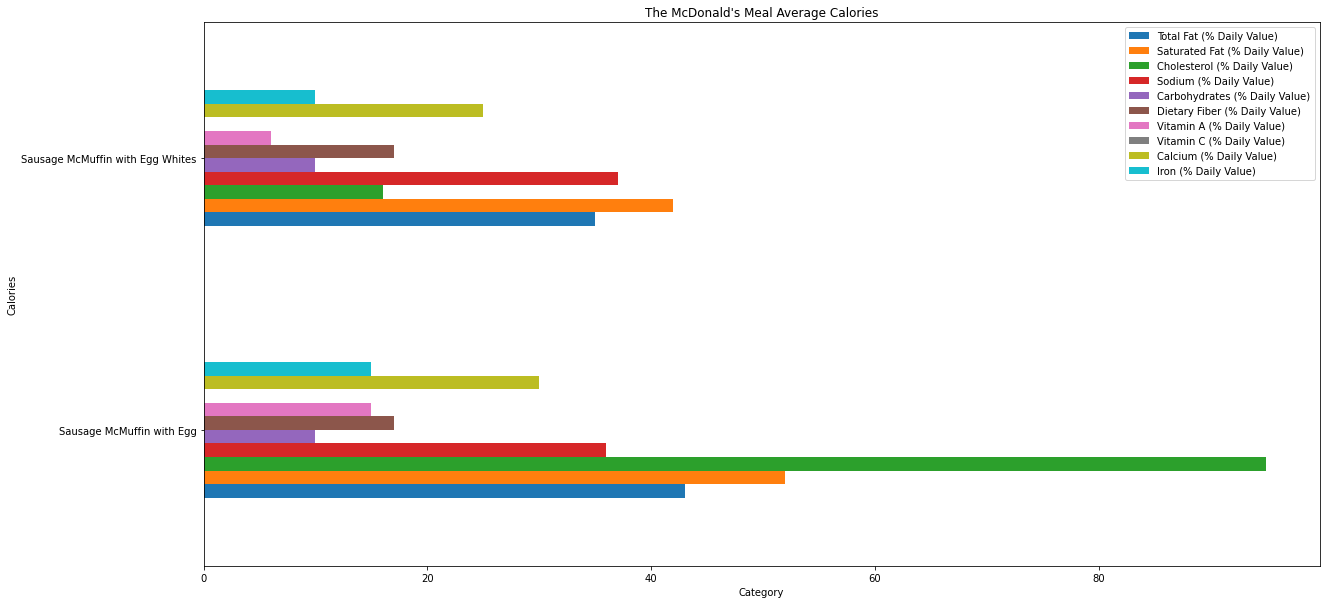

In [17]:
df_d3.plot(kind='barh', figsize=(20, 10))

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Calories') # add y-label to the plot
plt.title("The McDonald's Meal Average Calories") # add title to the plot

plt.show()

In [18]:
df_d4 = df_d2.iloc[0:2,:]
df_d4

,Category,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Item,,,,,,,,,,,
Egg McMuffin,Breakfast,20,25,87,31,10,17,10,0,25,15
Egg White Delight,Breakfast,12,15,8,32,10,17,6,0,25,8


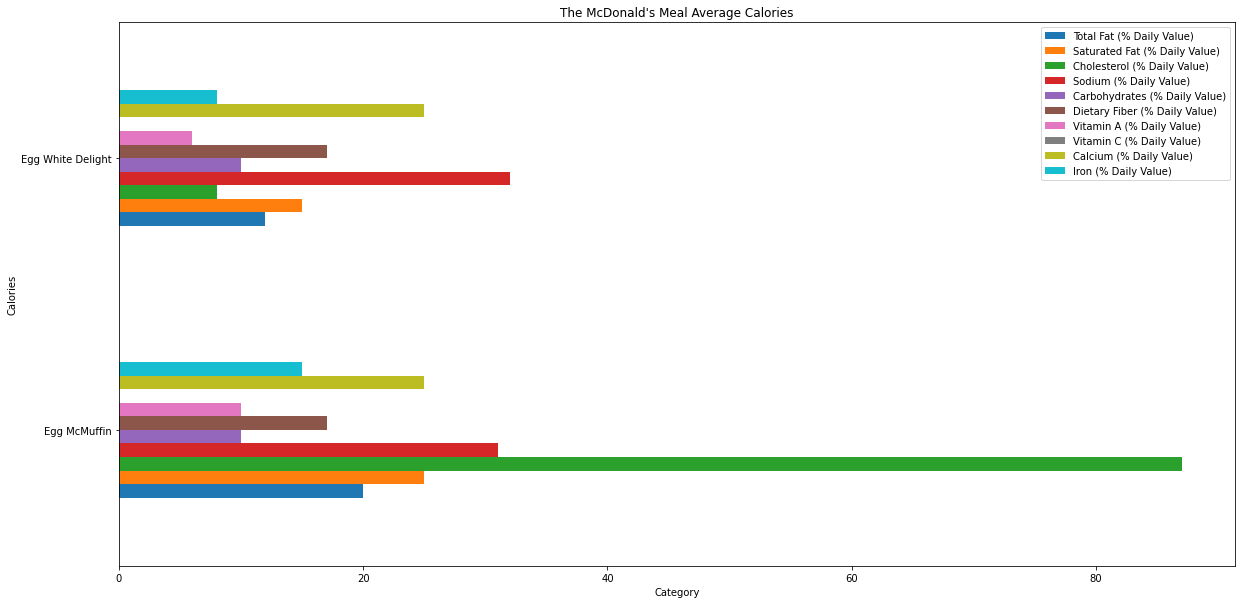

In [19]:
df_d4.plot(kind='barh', figsize=(20, 10))

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Calories') # add y-label to the plot
plt.title("The McDonald's Meal Average Calories") # add title to the plot

plt.show()

There are 2 menu that have two variation of egg (only egg whites and whole egg), so we compare 4 menu. From these bar charts, we can conclude that whole egg have greater total fat, saturated fat, cholesterol etc. It's make sense, because whole egg still have egg yolks that contains more fat and cholesterol value, also protein. Ordered menu with egg whites will be the right choice if you want an egg menu with low fat and cholesterol but the same (not exact) nutrition value. Otherwise, if you want an original nutrition from egg, you can choose menu that uses whole eggs in their ingredients.